Комментарии будут следующими:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("/content/telecom_churn.csv", delimiter = ",")
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

Описание столбцов
State: Штат, в котором проживает клиент.

Account length: Длина учетной записи (количество месяцев, которые клиент пользуется услугами).


Area code: Код региона (например, 415, 408).

International plan: Наличие международного плана (Yes/No).

Voice mail plan: Наличие плана голосовой почты (Yes/No).

Number vmail messages: Количество сообщений голосовой почты.

Total day minutes: Общее количество минут разговора в течение дня.

Total day calls: Общее количество звонков в течение дня.

Total day charge: Общая стоимость звонков в течение дня.

Total eve minutes: Общее количество минут разговора в вечернее время.

Total eve calls: Общее количество звонков в вечернее время.

Total eve charge: Общая стоимость звонков в вечернее время.

Total night minutes: Общее количество минут разговора ночью.

Total night calls: Общее количество звонков ночью.

Total night charge: Общая стоимость звонков ночью.

Total intl minutes: Общее количество международных минут разговора.

Total intl calls: Общее количество международных звонков.

Total intl charge: Общая стоимость международных звонков.

Customer service calls: Количество обращений в службу поддержки клиентов.

Churn: Целевая переменная, указывающая на отток клиента (True/False).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

Проверим наличие пропущенных значений

In [ ]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

Меняем значения Object в нашем случае Yes и No на числовые значения 1 и 0 соответсвенно . И точно также с целевой переменной


In [ ]:
df = df.replace({'Yes': 1, 'No': 0})
df = df.replace({True: 1, False: 0})
df.head()

<ipython-input-208-8f477dc43c4c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})
<ipython-input-208-8f477dc43c4c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Нормализация числовых признаков

In [ ]:
#scaler = StandardScaler()
#numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
#df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
#df[numerical_cols]

<div class="alert alert-block alert-success">
<b>Успех_16.11.2024:</b> отлично, совет: используйте для удобства  .head и .tail
</div>

# Задание № 2 Проведите основные статистические характеристики данных

### Посмотрите на распределение данных по нашей целевой переменной — churn

In [ ]:
print("Уникальные значения для категориальных переменных:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")

Уникальные значения для категориальных переменных:
State: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [ ]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100
churn_counts

Churn
0    85.508551
1    14.491449
Name: proportion, dtype: float64

In [ ]:
df['Churn'].describe()

count    3333.000000
mean        0.144914
std         0.352067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churn, dtype: float64

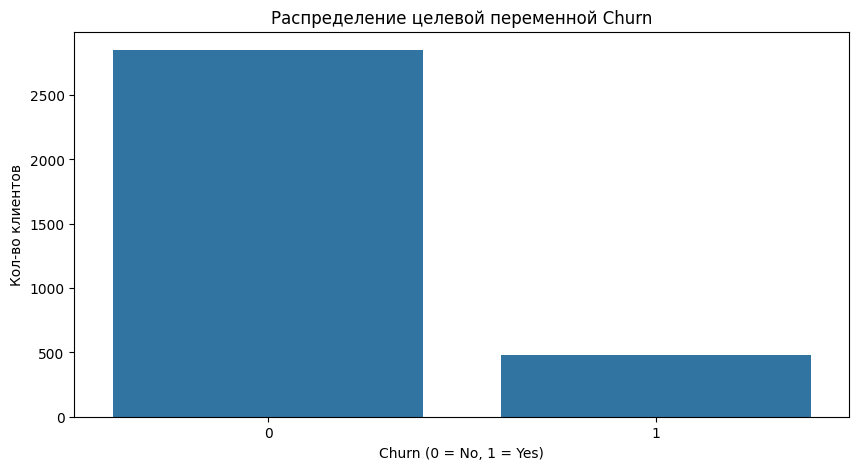

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Churn', data=df)
plt.title('Распределение целевой переменной Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Кол-во клиентов')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

<div class="alert alert-block alert-success">
<b>Успех:</b> отлично, можно двигаться дальше
</div>

#### задания_16.11.2024:

посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре include;

распределение пользователей по переменной area code;

отсортировать по значению признака 'total day charge'.

+ Аналитика к полученым закономерностям.

In [ ]:
non_numeric_stats = df.describe(include=['object'])
print("Статистика по нечисловым признакам:")
non_numeric_stats

Статистика по нечисловым признакам:


State
count   3333
unique    51
top       WV
freq     106

In [ ]:
df['Area code'].unique()

array([415, 408, 510])

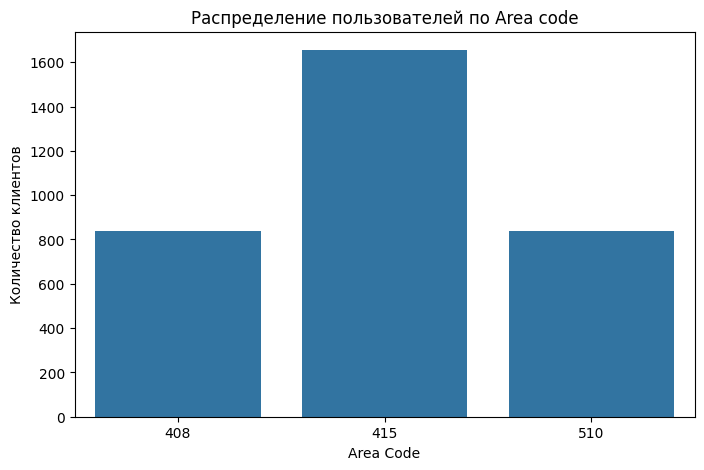

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Area code', data=df)
plt.title('Распределение пользователей по Area code')
plt.xlabel('Area Code')
plt.ylabel('Количество клиентов')
plt.show()

In [ ]:
df_sort = df.sort_values(by="Total day charge", ascending=False).head();df_sort

State  Account length  Area code  International plan  Voice mail plan  \
365     CO             154        415                   0                0   
985     NY              64        415                   1                0   
2594    OH             115        510                   1                0   
156     OH              83        415                   0                0   
605     MO             112        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
365                       0              350.8               75   
985                       0              346.8               55   
2594                      0              345.3               81   
156                       0              337.4              120   
605                       0              335.5               77   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
365              59.64              216.5               94             18.40   
985              58.96              249.5               79             21.21   
2594             58.70              203.4              106             17.29   
156              57.36              227.4              116             19.33   
605              57.04              212.5              109             18.06   

      Total night minutes  Total night calls  Total night charge  \
365                 253.9                100               11.43   
985                 275.4                102               12.39   
2594                217.5                107                9.79   
156                 153.9                114                6.93   
605                 265.0                132               11.93   

      Total intl minutes  Total intl calls  Total intl charge  \
365                 10.1                 9               2.73   
985                 13.3                 9               3.59   
2594                11.8                 8               3.19   
156                 15.8                 7               4.27   
605                 12.7                 8               3.43   

      Customer service calls  Churn  
365                        1      1  
985                        1      1  
2594                       1      1  
156                        0      1  
605                        2      1

In [ ]:
print("Топ клиентов по Total day charge:")
df_sort[['Total day charge', 'International plan', 'Voice mail plan']].head()

Топ клиентов по Total day charge:


Total day charge  International plan  Voice mail plan
365              59.64                   0                0
985              58.96                   1                0
2594             58.70                   1                0
156              57.36                   0                0
605              57.04                   0                0

**Аналитика полученных закономерностей**

**Клиенты с международными планами:**

  
  Если клиенты с международными планами имеют более высокие расходы, это может указывать на необходимость улучшения предложения для таких клиентов или создания новых тарифов.


**Географические особенности:**


 Если определенные коды региона показывают высокий уровень оттока (Churn), это может сигнализировать о проблемах с обслуживанием или конкуренции в этих областях.


**Высокие затраты:**


 Клиенты с высокими затратами могут быть более чувствительными к изменениям в ценах. Это открывает возможности для внедрения программ лояльности или специальных предложений для удержания таких клиентов.


**Сегментация:**


 Полученные данные могут помочь в сегментации клиентов на основе их поведения и предпочтений, что позволит более эффективно разрабатывать маркетинговые стратегии и предложения.

<div class="alert alert-block alert-success">
<b>Успех_16.11.2024:</b> отлично
</div>

### Задание: пользуется ли популярностью среди пользователей роуминг? Необходимо обосновано ответить на обозначенный вопрос.

In [ ]:
df.select_dtypes(include=np.number)[df["Churn"] == 1].mean()

Account length            102.664596
Area code                 437.817805
International plan          0.283644
Voice mail plan             0.165631
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

ср. время пользование телефоном

In [ ]:
df[df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823

In [ ]:
df[(df["Churn"] == 0) & (df["International plan"] == 0)]["Total intl minutes"].max()

18.9

Процентное соотношение пользователей с роумингом

In [ ]:
international_plan_counts = df['International plan'].value_counts(normalize=True) * 100
international_plan_counts

International plan
0    90.309031
1     9.690969
Name: proportion, dtype: float64

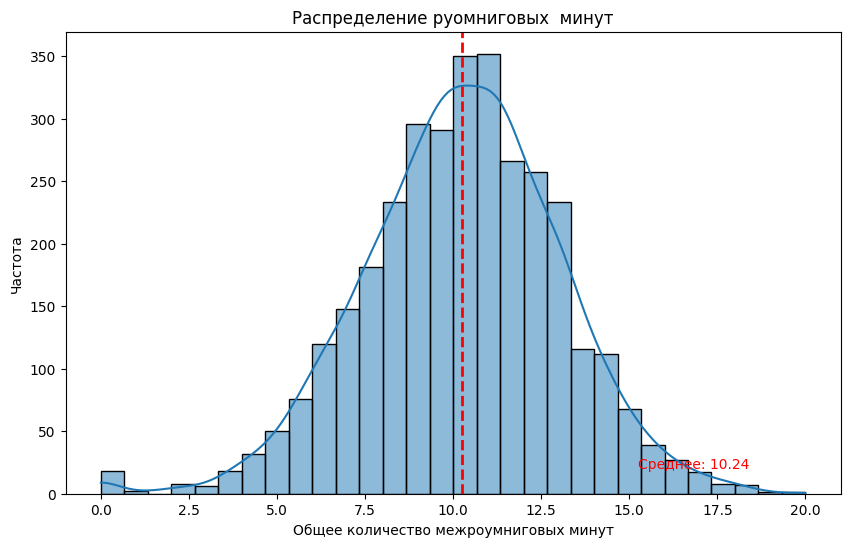

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total intl minutes'], bins=30, kde=True)
plt.title('Распределение руомниговых  минут')
plt.xlabel('Общее количество межроумниговых минут')
plt.ylabel('Частота')
plt.axvline(df['Total intl minutes'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(df['Total intl minutes'].mean() + 5, 20, f'Среднее: {df["Total intl minutes"].mean():.2f}', color='red')
plt.show()

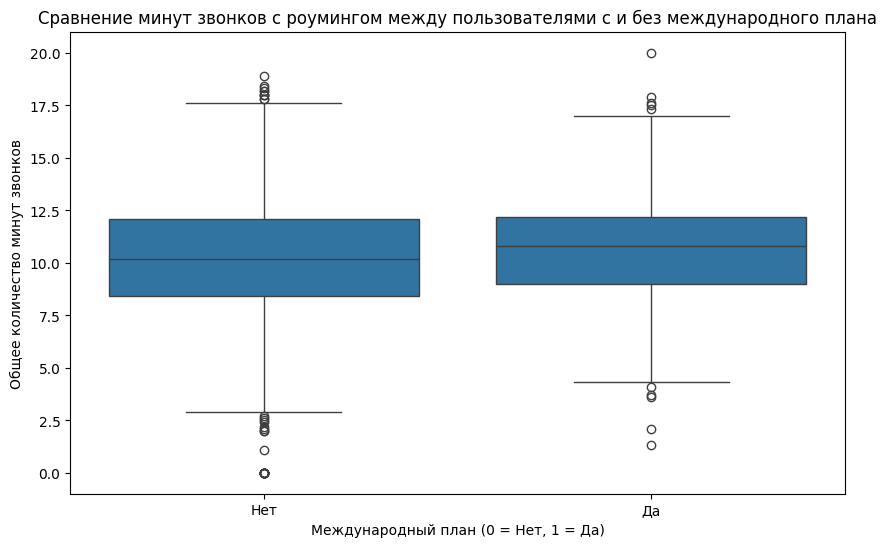

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='International plan', y='Total intl minutes', data=df)
plt.title('Сравнение минут звонков с роумингом между пользователями с и без международного плана')
plt.xlabel('Международный план (0 = Нет, 1 = Да)')
plt.ylabel('Общее количество минут звонков')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'])
plt.show()

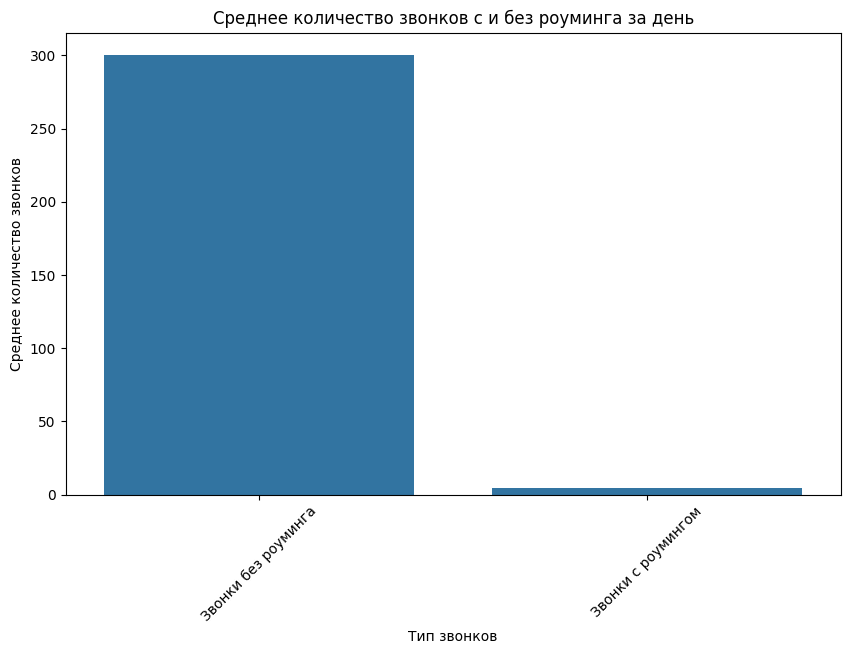

In [ ]:
total_calls_without_roaming = df['Total day calls'].sum() + df['Total eve calls'].sum() + df['Total night calls'].sum()


total_calls_with_roaming = df['Total intl calls'].sum()

num_customers = df.shape[0]


average_calls_without_roaming = total_calls_without_roaming / num_customers
average_calls_with_roaming = total_calls_with_roaming / num_customers


labels = ['Звонки без роуминга', 'Звонки с роумингом']
values = [average_calls_without_roaming, average_calls_with_roaming]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values)
plt.title('Среднее количество звонков с и без роуминга за день')
plt.xlabel('Тип звонков')
plt.ylabel('Среднее количество звонков')
plt.xticks(rotation=45)
plt.show()
plt.show()

In [ ]:
df["Total eve charge"].mean()

17.083540354035403

In [ ]:
df["Total intl charge"].mean()

2.7645814581458144

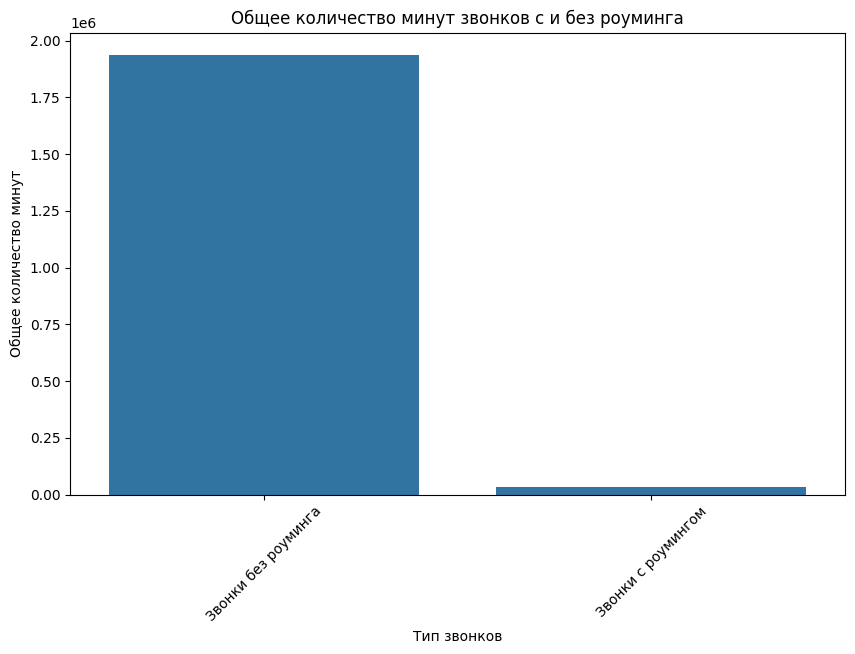

In [ ]:
total_minutes_without_roaming = df['Total day minutes'].sum() + df['Total eve minutes'].sum() + df['Total night minutes'].sum()


total_minutes_with_roaming = df['Total intl minutes'].sum()


labels = ['Звонки без роуминга', 'Звонки с роумингом']
values = [total_minutes_without_roaming, total_minutes_with_roaming]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values)
plt.title('Общее количество минут звонков с и без роуминга')
plt.xlabel('Тип звонков')
plt.ylabel('Общее количество минут')
plt.xticks(rotation=45)
plt.show()

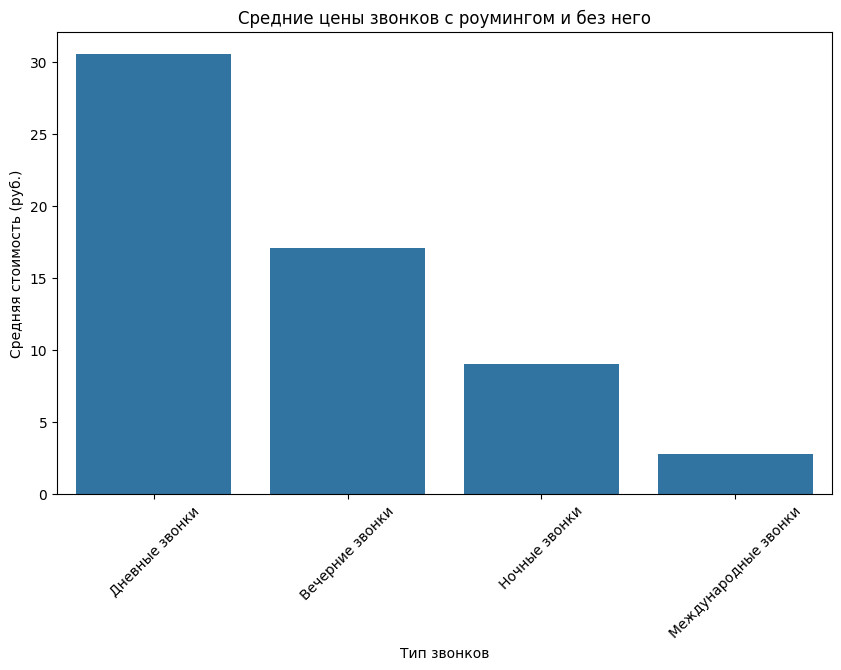

In [ ]:
average_day_charge = df['Total day charge'].mean()
average_eve_charge = df['Total eve charge'].mean()
average_night_charge = df['Total night charge'].mean()

average_intl_charge = df['Total intl charge'].mean()


labels = ['Дневные звонки', 'Вечерние звонки', 'Ночные звонки', 'Международные звонки']
values = [average_day_charge, average_eve_charge, average_night_charge, average_intl_charge]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values)
plt.title('Средние цены звонков с роумингом и без него')
plt.xlabel('Тип звонков')
plt.ylabel('Средняя стоимость (руб.)')
plt.xticks(rotation=45)
plt.show()

На основании проведенного анализа можно заключить, что роуминг пользуется определенной популярностью среди пользователей. Однако большинство клиентов не используют услуги роуминга в значительных объемах, что может указывать на осторожность пользователей в отношении высоких затрат на связь за границей или на наличие альтернативных решений для общения.

Преподователь принял, работа проверена


Задание_23.11.2024_: предложите стратегические решения для стейкхолдера (телеком компании), представившего Вам данный датасет, для привлечения клиентов.

In [ ]:
import seaborn as sns

In [ ]:
df.groupby('Voice mail plan')['Churn'].mean()

Voice mail plan
0    0.167151
1    0.086768
Name: Churn, dtype: float64

<Axes: xlabel='count', ylabel='Customer service calls'>

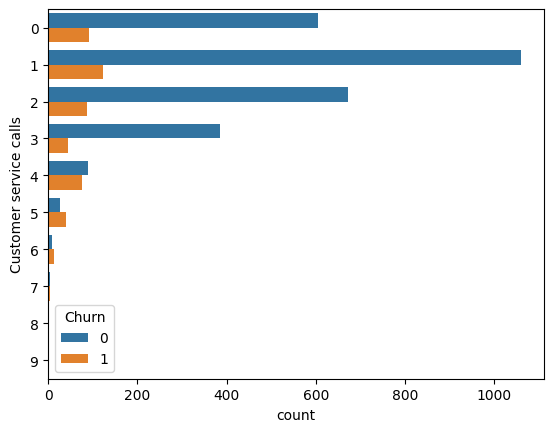

In [ ]:
sns.countplot(y='Customer service calls', hue='Churn', data=df)

In [ ]:
df['Area code'].value_counts()

Area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [ ]:
df_numerical = df[['Account length', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn', 'International plan', 'Voice mail plan']]
df_numerical.corr().round(2)

Account length  Number vmail messages  \
Account length                    1.00                  -0.00   
Number vmail messages            -0.00                   1.00   
Total day minutes                 0.01                   0.00   
Total day calls                   0.04                  -0.01   
Total day charge                  0.01                   0.00   
Total eve minutes                -0.01                   0.02   
Total eve calls                   0.02                  -0.01   
Total eve charge                 -0.01                   0.02   
Total night minutes              -0.01                   0.01   
Total night calls                -0.01                   0.01   
Total night charge               -0.01                   0.01   
Total intl minutes                0.01                   0.00   
Total intl calls                  0.02                   0.01   
Total intl charge                 0.01                   0.00   
Customer service calls           -0.00                  -0.01   
Churn                             0.02                  -0.09   
International plan                0.02                   0.01   
Voice mail plan                   0.00                   0.96   

                        Total day minutes  Total day calls  Total day charge  \
Account length                       0.01             0.04              0.01   
Number vmail messages                0.00            -0.01              0.00   
Total day minutes                    1.00             0.01              1.00   
Total day calls                      0.01             1.00              0.01   
Total day charge                     1.00             0.01              1.00   
Total eve minutes                    0.01            -0.02              0.01   
Total eve calls                      0.02             0.01              0.02   
Total eve charge                     0.01            -0.02              0.01   
Total night minutes                  0.00             0.02              0.00   
Total night calls                    0.02            -0.02              0.02   
Total night charge                   0.00             0.02              0.00   
Total intl minutes                  -0.01             0.02             -0.01   
Total intl calls                     0.01             0.00              0.01   
Total intl charge                   -0.01             0.02             -0.01   
Customer service calls              -0.01            -0.02             -0.01   
Churn                                0.21             0.02              0.21   
International plan                   0.05             0.00              0.05   
Voice mail plan                     -0.00            -0.01             -0.00   

                        Total eve minutes  Total eve calls  Total eve charge  \
Account length                      -0.01             0.02             -0.01   
Number vmail messages                0.02            -0.01              0.02   
Total day minutes                    0.01             0.02              0.01   
Total day calls                     -0.02             0.01             -0.02   
Total day charge                     0.01             0.02              0.01   
Total eve minutes                    1.00            -0.01              1.00   
Total eve calls                     -0.01             1.00             -0.01   
Total eve charge                     1.00            -0.01              1.00   
Total night minutes                 -0.01            -0.00             -0.01   
Total night calls                    0.01             0.01              0.01   
Total night charge                  -0.01            -0.00             -0.01   
Total intl minutes                  -0.01             0.01             -0.01   
Total intl calls                     0.00             0.02              0.00   
Total intl charge                   -0.01             0.01             -0.01   
Customer service calls              -0.01             0.00         

<Axes: >

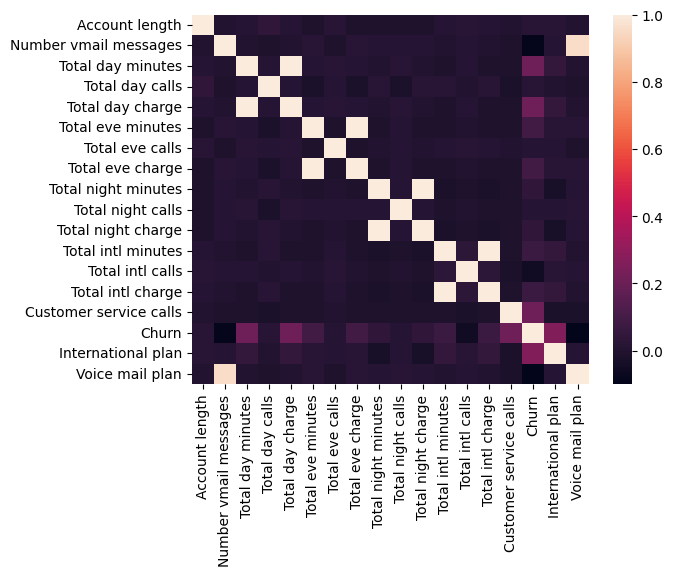

In [ ]:
sns.heatmap(df_numerical.corr().round(2))

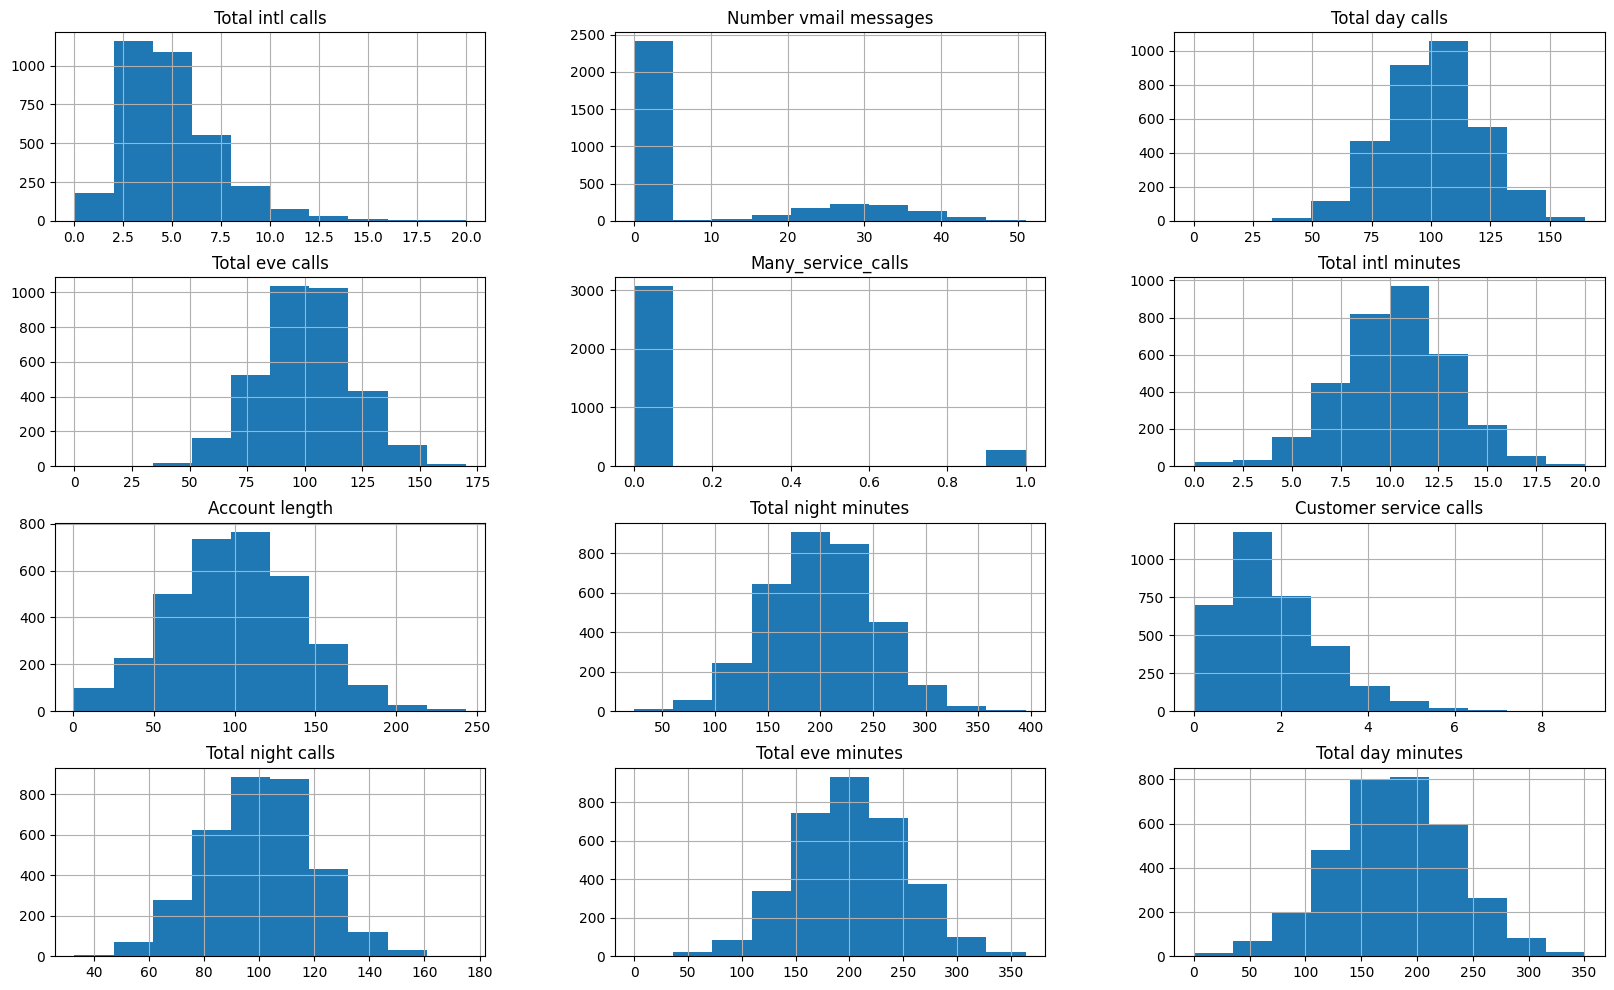

In [ ]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn']))

df[features].hist(figsize=(20,12));

Видим, что большинство признаков распределены нормально. Исключения – число звонков в сервисный центр (Customer service calls) (тут больше подходит пуассоновское распределение) и число голосовых сообщений (Number vmail messages, пик в нуле, т.е. это те, у кого голосовая почта не подключена). Также смещено распределение числа международных звонков (Total intl calls).

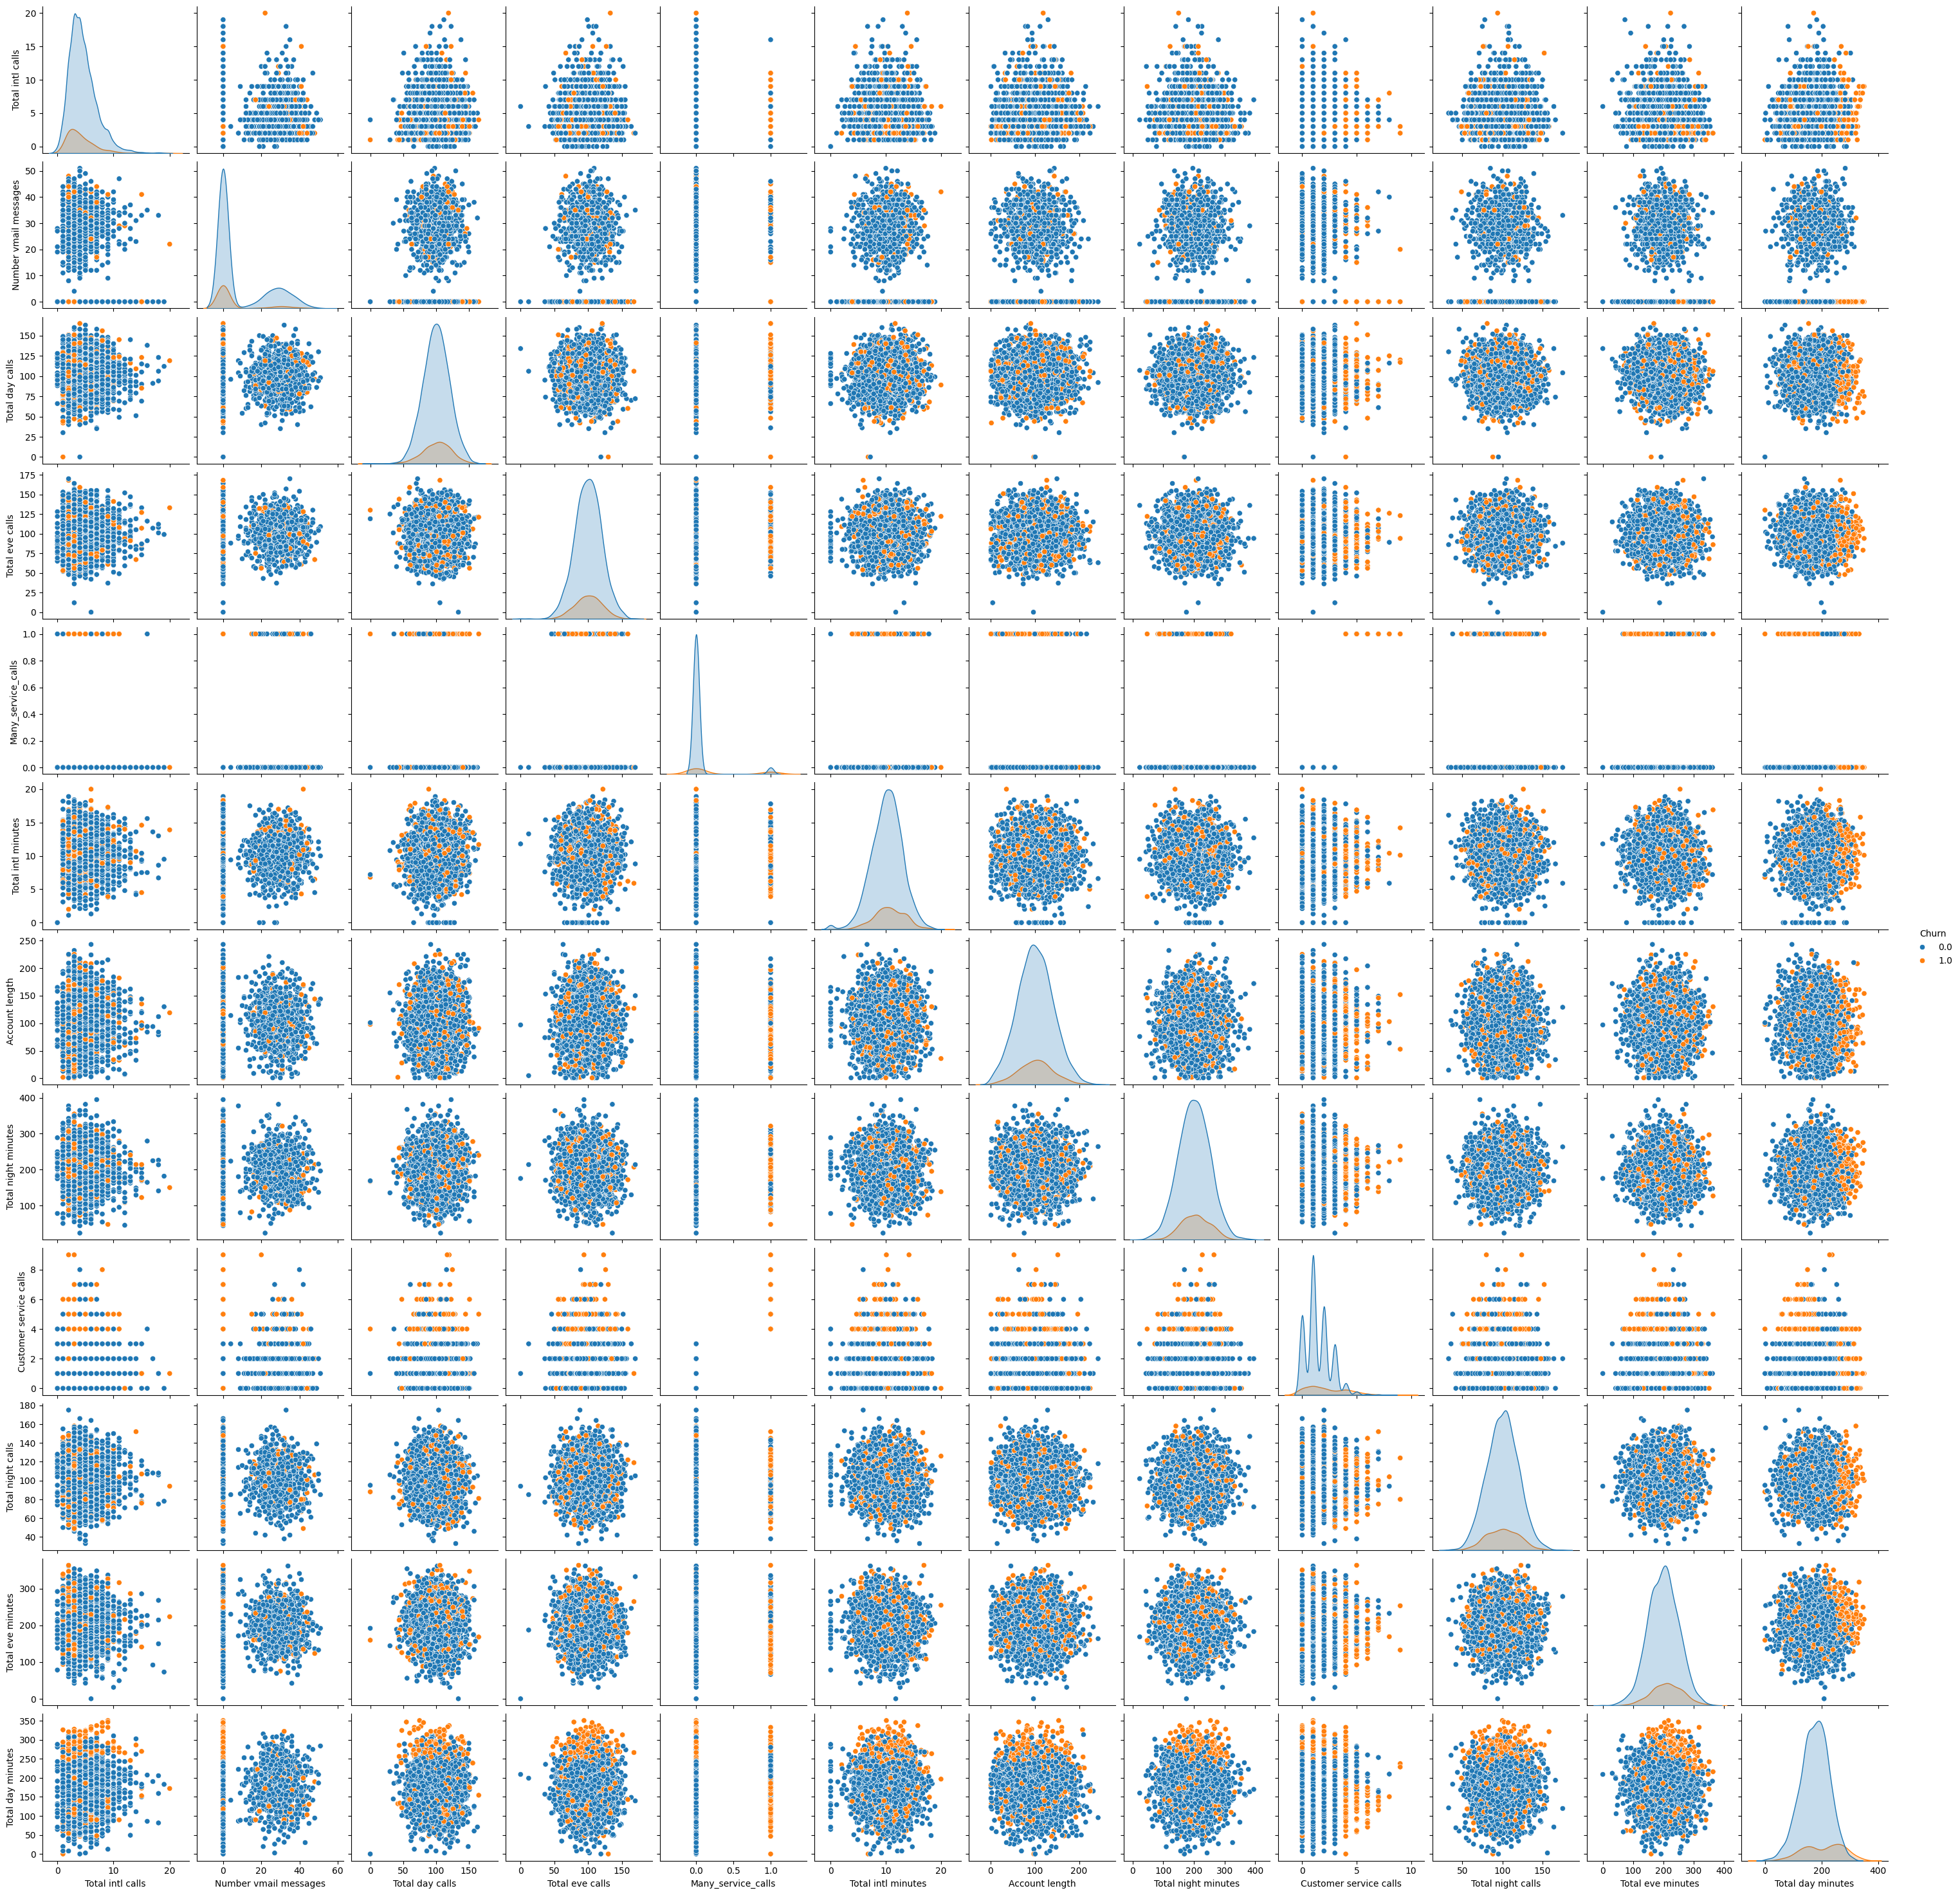

In [ ]:
sns.pairplot(df[features + ['Churn']], hue='Churn');

На глаз наибольшее отличие мы видим для признаков Total day minutes, Customer service calls и Number vmail messages.

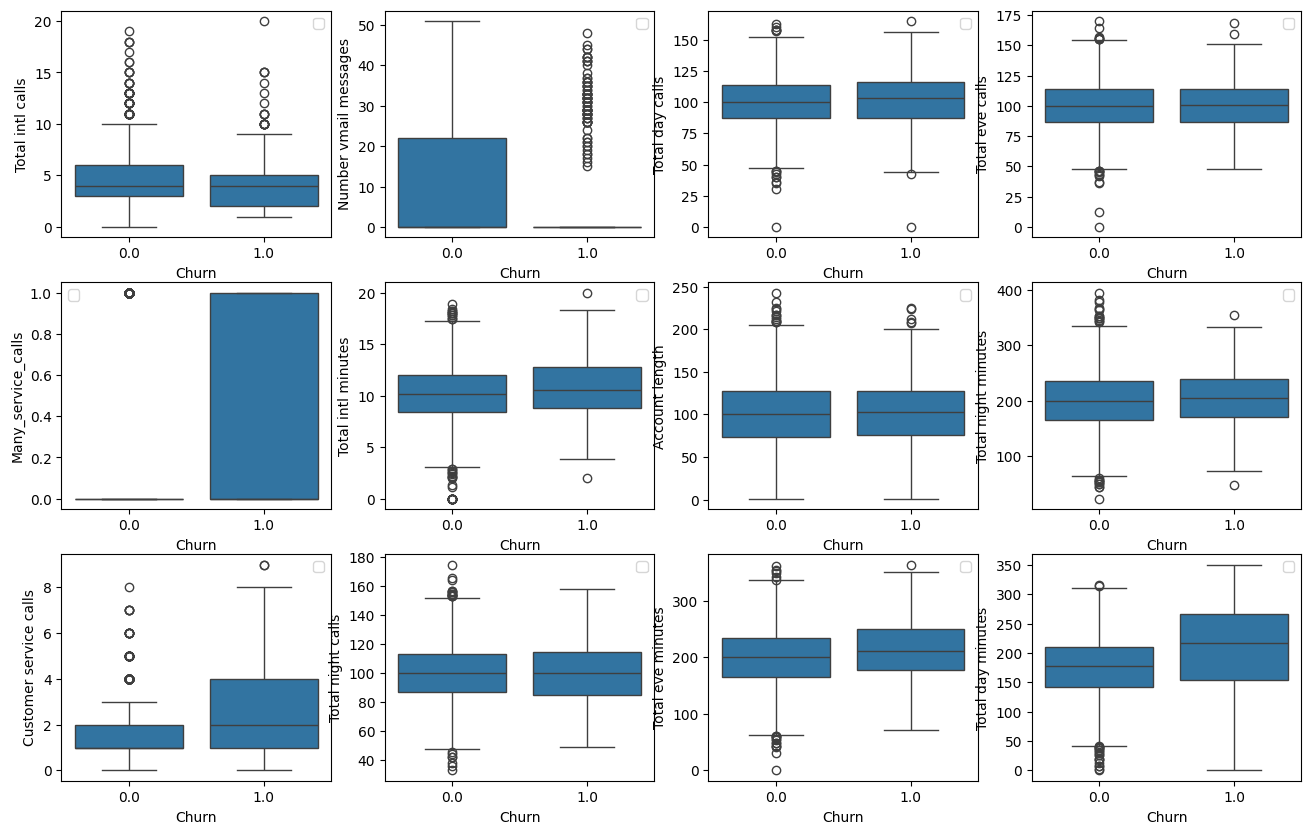

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].legend()
    axes[int(idx / 4), idx % 4].set_xlabel('Churn')
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

Посмотрим отдельно на картинки с распределением кол-ва проговоренных днем минут среди лояльных/ушедших. Слева - знакомые нам боксплоты, справа – сглаженные гистограммы распределения числового признака в двух группах (скорее просто красивая картинка, все и так понятно по боксплоту).

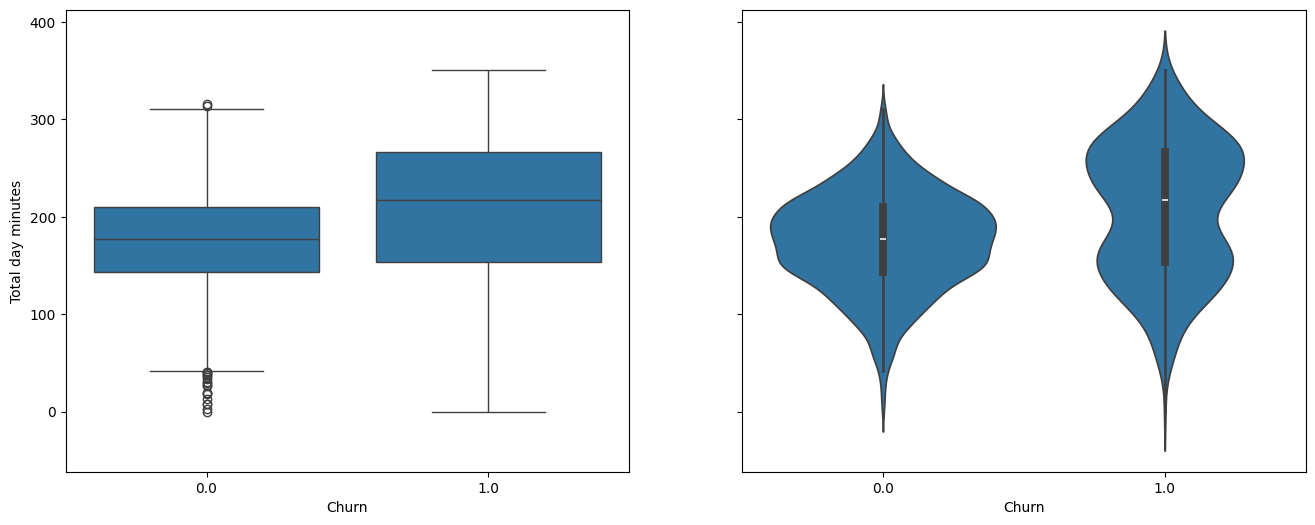

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

Интересное наблюдение: в среднем ушедшие клиенты больше пользуются связью. Возможно, они недовольны тарифами, и одной из мер борьбы с оттоком будет понижение тарифных ставок (стоимости мобильной связи). Но это уже компании надо будет проводить дополнительный экономический анализ, действительно ли такие меры будут оправданы.

In [ ]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
0      49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
1       3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
0      52  71  96  68  
1      14   7  10   9  

[2 rows x 51 columns]

Доли оттока для каждого штата:

In [ ]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

<ipython-input-215-21aec3187769>:1: FutureWarning: The provided callable <function mean at 0x79231345d5a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T


State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

Видно, что в Нью-Джерси и Калифорнии доля оттока выше 25%, а на Гавайях и в Аляске меньше 5%. Но эти выводы построены на слишком скромной статистике и возможно, это просто особенности имеющихся данных (тут можно и гипотезы попроверять про корреляции Мэтьюса и Крамера, но это уже за рамками данной статьи).

Зависимость  времяни использования аккаунта от количества обращений в колл-центр

In [ ]:
print(df['Account length'].corr(df['Customer service calls']))

-0.0037959389270460554


In [ ]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None

df = df.applymap(convert_to_float)

<ipython-input-161-78cea0f2357f>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(convert_to_float)


[[561   5]
 [ 32  69]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       566
         1.0       0.93      0.68      0.79       101

    accuracy                           0.94       667
   macro avg       0.94      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



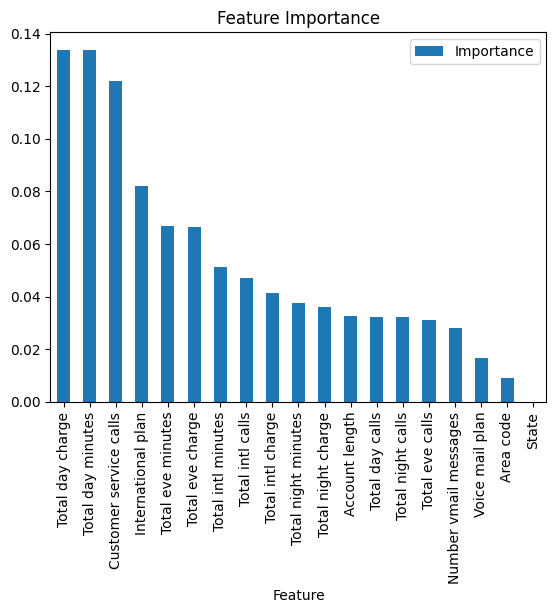

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False).plot(kind='bar', x='Feature', y='Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
crosstab_service_calls = pd.crosstab(df['Customer service calls'], df['Churn'], margins=False)
crosstab_service_calls

Churn                    0.0  1.0
Customer service calls           
0.0                      605   92
1.0                     1059  122
2.0                      672   87
3.0                      385   44
4.0                       90   76
5.0                       26   40
6.0                        8   14
7.0                        4    5
8.0                        1    1
9.0                        0    2

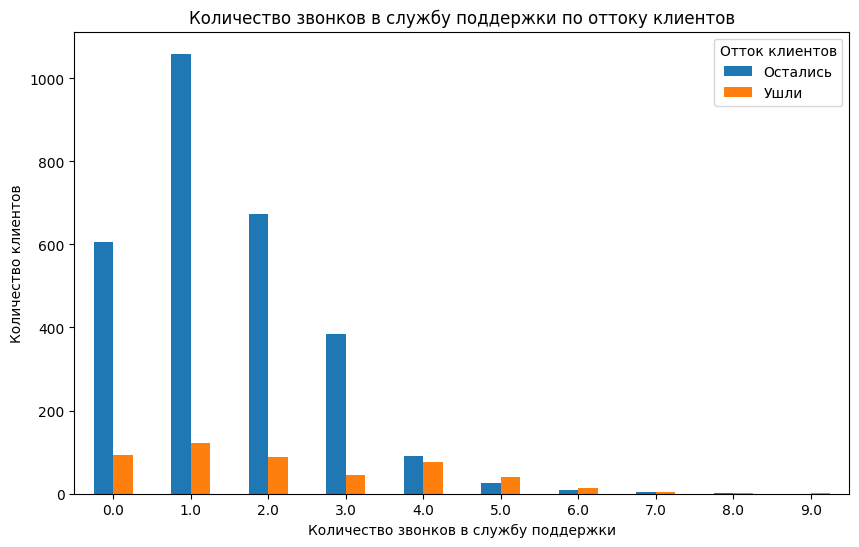

In [ ]:
crosstab_service_calls.plot(kind='bar', figsize=(10, 6))
plt.title('Количество звонков в службу поддержки по оттоку клиентов')
plt.xlabel('Количество звонков в службу поддержки')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.legend(title='Отток клиентов', labels=['Остались', 'Ушли'])
plt.show()

In [ ]:
crosstab_day_charge = pd.crosstab(pd.cut(df['Total day charge'], bins=10), df['Churn'], margins=False)
crosstab_day_charge

Churn             0.0  1.0
Total day charge          
(-0.0596, 5.964]   13    1
(5.964, 11.928]    58    9
(11.928, 17.892]  180   21
(17.892, 23.856]  412   67
(23.856, 29.82]   718   87
(29.82, 35.784]   760   45
(35.784, 41.748]  510   84
(41.748, 47.712]  164  100
(47.712, 53.676]   35   49
(53.676, 59.64]     0   20

<Figure size 1000x600 with 0 Axes>

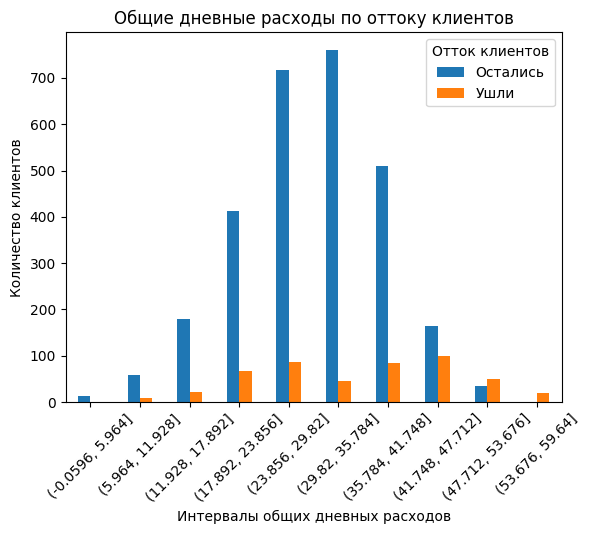

In [ ]:
plt.figure(figsize=(10, 6))
crosstab_day_charge.plot(kind='bar', stacked=False)
plt.title('Общие дневные расходы по оттоку клиентов')
plt.xlabel('Интервалы общих дневных расходов')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.legend(title='Отток клиентов', labels=['Остались', 'Ушли'])
plt.show()

In [ ]:
crosstab_day_minutes = pd.crosstab(pd.cut(df['Total day minutes'], bins=10), df['Churn'], margins=False)
crosstab_day_minutes

Churn              0.0  1.0
Total day minutes          
(-0.351, 35.08]     13    1
(35.08, 70.16]      58    9
(70.16, 105.24]    180   21
(105.24, 140.32]   412   67
(140.32, 175.4]    711   87
(175.4, 210.48]    767   45
(210.48, 245.56]   510   84
(245.56, 280.64]   164  100
(280.64, 315.72]    35   49
(315.72, 350.8]      0   20

<Figure size 1000x600 with 0 Axes>

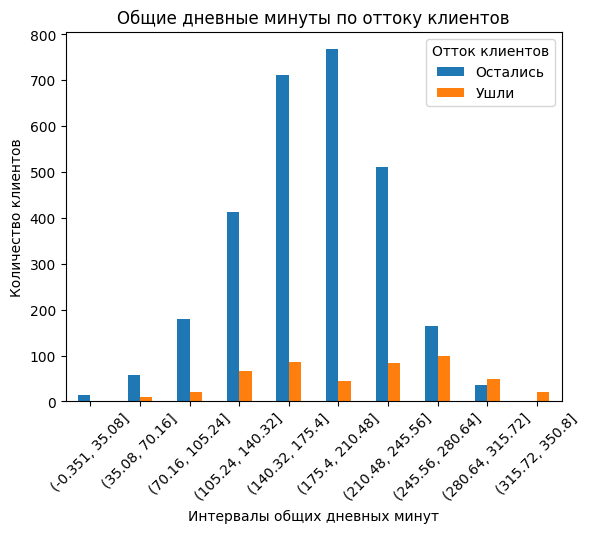

In [ ]:
plt.figure(figsize=(10, 6))
crosstab_day_minutes.plot(kind='bar', stacked=False)
plt.title('Общие дневные минуты по оттоку клиентов')
plt.xlabel('Интервалы общих дневных минут')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.legend(title='Отток клиентов', labels=['Остались', 'Ушли'])
plt.show()

In [ ]:
crosstab_int_plan = pd.crosstab(pd.cut(df['International plan'], bins=10), df['Churn'], margins=False)
crosstab_int_plan

Churn                0.0  1.0
International plan           
(-0.001, 0.1]       2664  346
(0.9, 1.0]           186  137

<Figure size 1000x600 with 0 Axes>

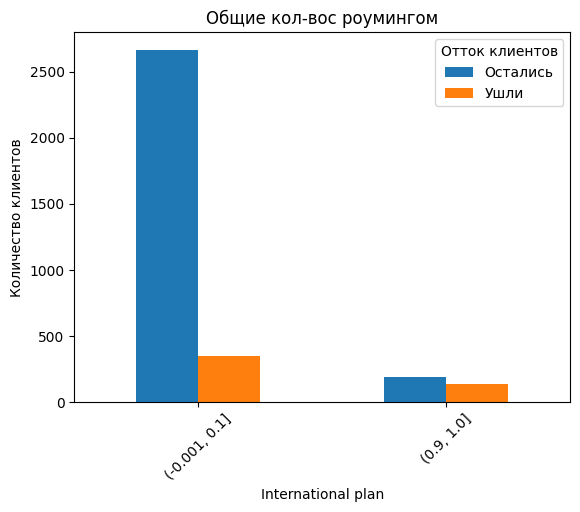

In [ ]:
plt.figure(figsize=(10, 6))
crosstab_int_plan.plot(kind='bar', stacked=False)
plt.title('Общие кол-вос роумингом')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.legend(title='Отток клиентов', labels=['Остались', 'Ушли'])
plt.show()

In [ ]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn                0.0  1.0   All
Many_service_calls                 
0                   2721  345  3066
1                    129  138   267
All                 2850  483  3333

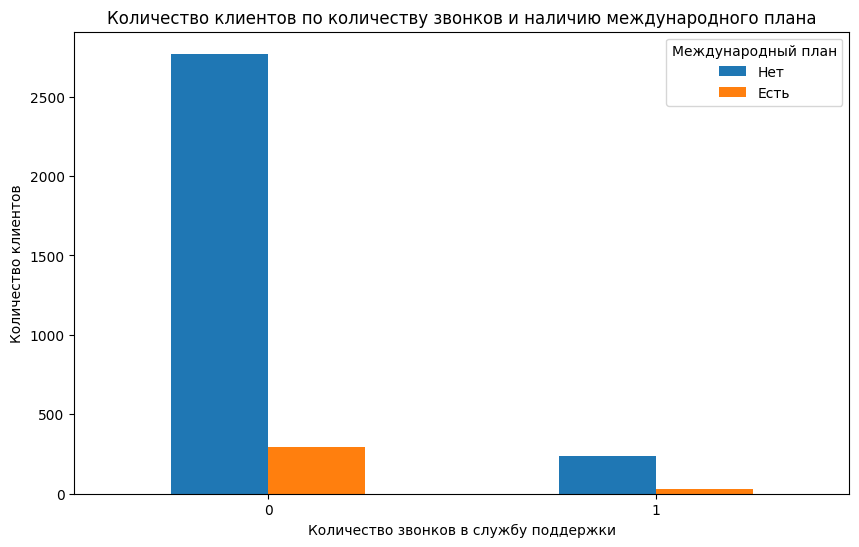

In [ ]:
crosstab_service_calls_international = pd.crosstab(df['Many_service_calls'], df['International plan'], values=df['Churn'], aggfunc='count', margins=False)

crosstab_service_calls_international.columns = ['No International Plan', 'International Plan']

crosstab_service_calls_international.plot(kind='bar', figsize=(10, 6))
plt.title('Количество клиентов по количеству звонков и наличию международного плана')
plt.xlabel('Количество звонков в службу поддержки')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.legend(title='Международный план', labels=['Нет', 'Есть'])
plt.show()

**1. количество звонков в службу поддержки**

Высокое количество звонков в службу поддержки (например, более 3) может коррелировать с повышенным оттоком клиентов.

**Рекомендации:**

**Улучшение качества обслуживания** - Провести анализ причин, по которым клиенты обращаются в службу поддержки. Возможно, стоит улучшить качество услуг или предоставить дополнительные ресурсы для самообслуживания, такие как FAQ или чаты.


**Обучение персонала** - Инвестировать в обучение сотрудников службы поддержки для повышения их компетентности и способности решать проблемы клиентов на первом уровне обращения.

**2. обще дневные расходы**

Разделение клиентов по интервалам общих дневных расходов может показать, что клиенты с низкими расходами имеют более высокий уровень оттока.

**Рекомендации:**

**Персонализированные предложения** - Разработать специальные предложения или пакеты услуг для клиентов с низкими расходами, чтобы стимулировать их к увеличению потребления.

**Программы лояльности** -  Внедрить программы лояльности, которые вознаграждают клиентов за увеличение расходов или длительное использование услуг.

**3.общие дневные минуты**

Клиенты, использующие меньше минут, могут также иметь более высокий уровень оттока.

**Рекомендации:**

**Адаптация тарифов** - Рассмотреть возможность введения тарифных планов, ориентированных на клиентов с низким использованием минут, чтобы сделать услуги более доступными и привлекательными.

**Обучение клиентов** -  Проводить образовательные кампании о том, как максимально эффективно использовать услуги связи.

**4. Звонки с роумнигом**

**Результат:**

 Клиенты с большим количеством звонков и наличием международного плана могут иметь разные уровни оттока.

**Рекомендации:**

**Сегментация клиентов**

 Сегментировать клиентов по количеству звонков и наличию международного плана для более точного таргетинга маркетинговых кампаний.

**Специальные предложения для международных планов**

Создать привлекательные предложения для клиентов с международным планом, которые часто используют услуги связи за границей.